# CAR PRICE PREDICTOR 🏎️  🚙  🚕

In this project , we predict the price of a car,cosidering the following properties:
        1.Car name
        2.Fuel type
        3.Drive wheel
        4.Engine location
        5.Wheelbase
        6.Length
        7.Width
        8.Mileage 
        9.Aspiration
        10.Number of cylinders 
    and many other factors..
    This is going to be a Linear Regression model (Multiple Linear Regression)

# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DATA ANLYSIS

In [2]:
car=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")
car.head(100)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,nissan juke,gas,std,two,hatchback,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799.0
96,97,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
98,99,2,nissan clipper,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249.0


In [94]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [92]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [24]:
carr=car.drop(columns=['car_ID','symboling','CarName','doornumber','enginelocation','fuelsystem','fueltype','aspiration','enginetype','cylindernumber'])
target=car.price
print(carr)
print()
print("PRICE column:")
print()
print(target)

         carbody drivewheel  wheelbase  carlength  carwidth  carheight  \
0    convertible        rwd       88.6      168.8      64.1       48.8   
1    convertible        rwd       88.6      168.8      64.1       48.8   
2      hatchback        rwd       94.5      171.2      65.5       52.4   
3          sedan        fwd       99.8      176.6      66.2       54.3   
4          sedan        4wd       99.4      176.6      66.4       54.3   
..           ...        ...        ...        ...       ...        ...   
200        sedan        rwd      109.1      188.8      68.9       55.5   
201        sedan        rwd      109.1      188.8      68.8       55.5   
202        sedan        rwd      109.1      188.8      68.9       55.5   
203        sedan        rwd      109.1      188.8      68.9       55.5   
204        sedan        rwd      109.1      188.8      68.9       55.5   

     curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  \
0          2548         130    

# DATA TRANSFORMATION

Here we convert the categorical values into numerical values , so that we can use it for our model training and prediction !

In [49]:
from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()

# carr['fueltype']=Numerics.fit_transform(carr['fueltype'])
# carr['aspiration']=Numerics.fit_transform(carr['aspiration'])
carr['carbody']=Numerics.fit_transform(carr['carbody'])
# carr['enginetype']=Numerics.fit_transform(carr['enginetype'])
# carr['cylindernumber']=Numerics.fit_transform(carr['cylindernumber'])

carr

,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,3,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,3,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3,2,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,3,2,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,3,2,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,3,2,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


# EXPLORATORY DATA ANALYSIS

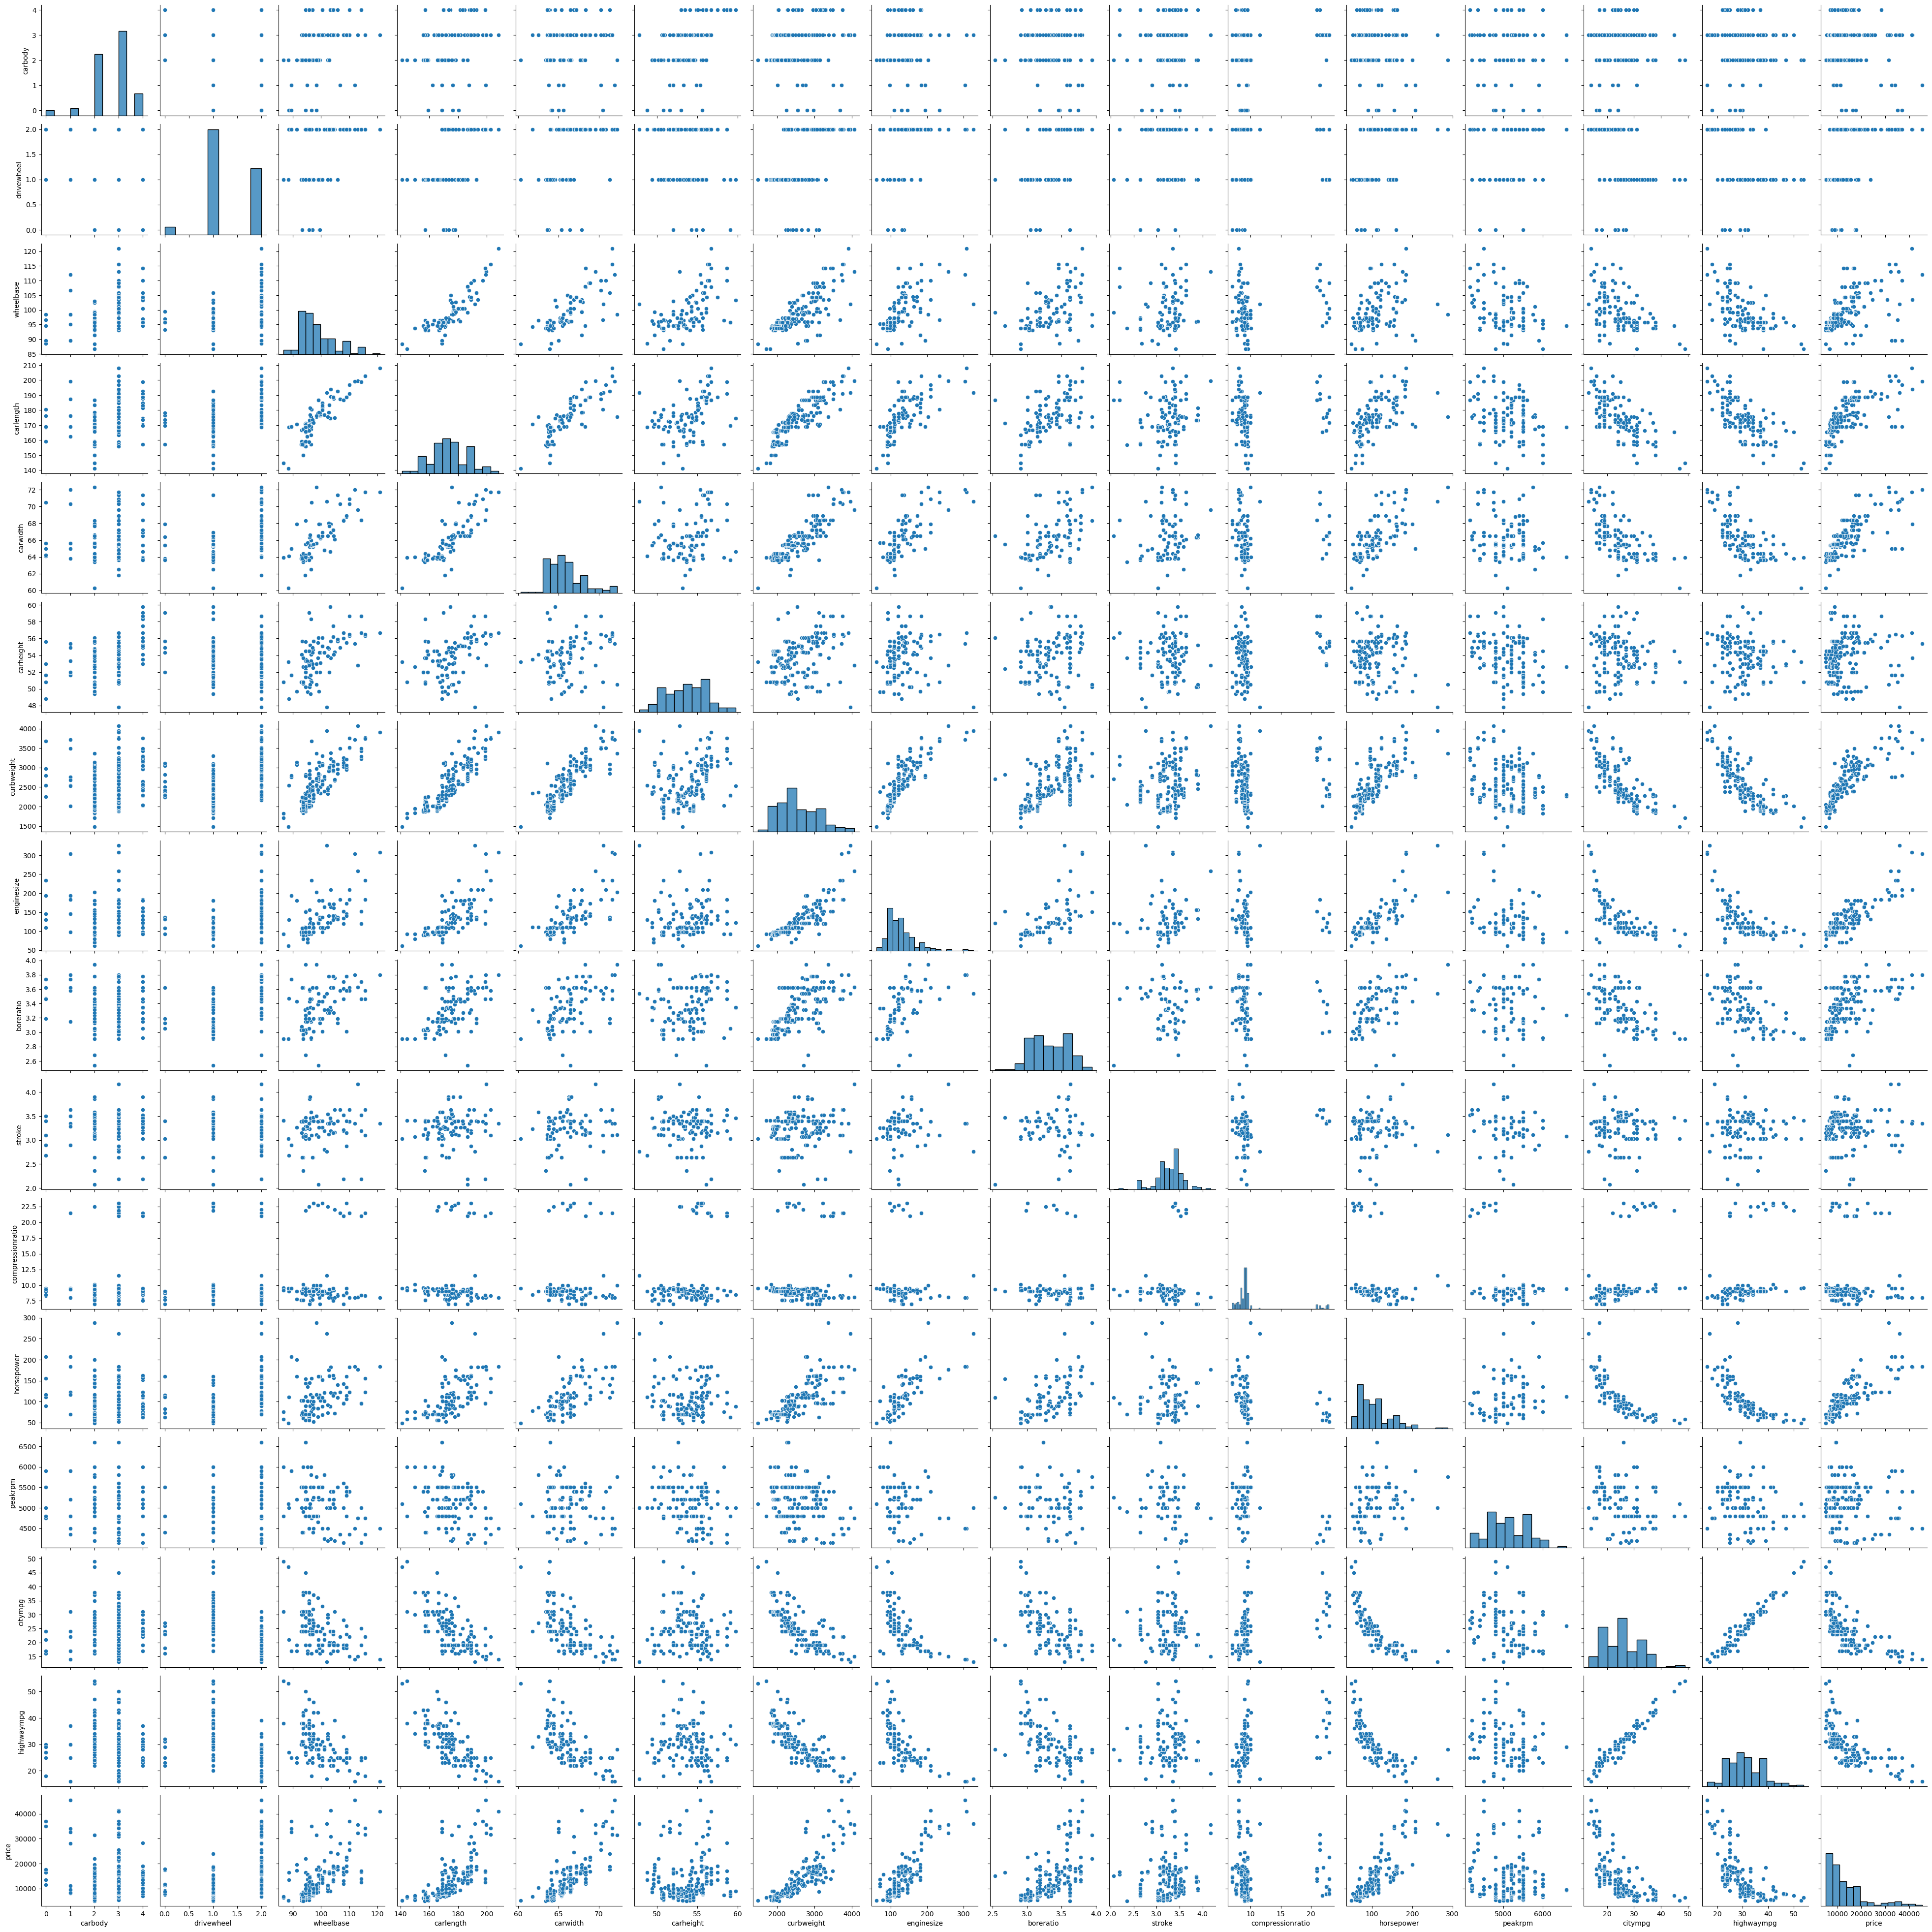

In [50]:
sns.pairplot(carr)

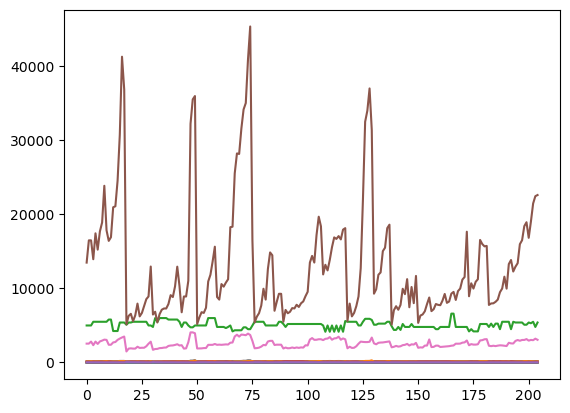

In [90]:
plt.plot(carr)

In [51]:
carr.columns

Index(['carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# DATA SPLIT 

In [52]:
X=carr[['carbody', 'wheelbase','carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y=carr['price']

In [74]:
from sklearn.model_selection import train_test_split     # splitting the data into training data and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7002)

# MODEL CREATION AND TRAINING

In [75]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression()

# PLOTTING ACTUAL vs PREDICTED VALUES

Text(0, 0.5, 'Predicted values')

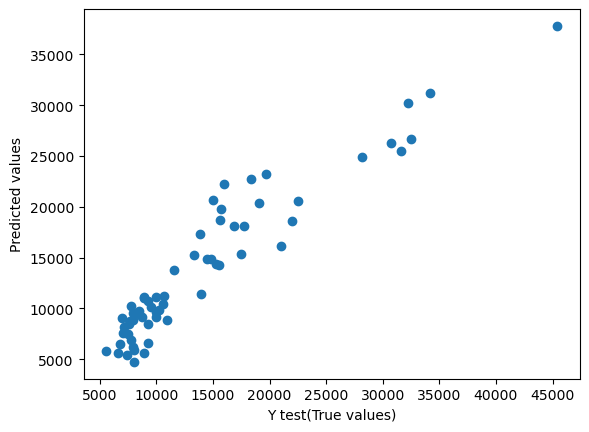

In [87]:
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y test(True values)')
plt.ylabel('Predicted values')


# MODEL'S ACCURACY : 

In [95]:
model.score(X_test,y_test)

0.8926718274228483

In [96]:
print("ACCURACY IS :",model.score(X_test,y_test)*100 )

ACCURACY IS : 89.26718274228483


Thus, the model has prediction with an accuracy of 89 % 